In [48]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [232]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [267]:
global_model = GlobalDistribution.load(model_path)

In [268]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

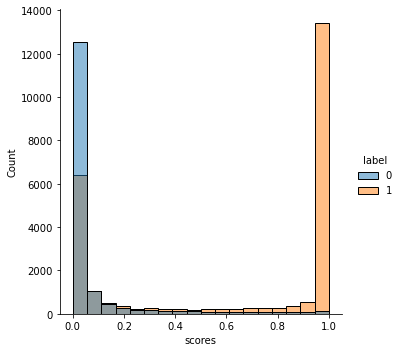

In [269]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [297]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [298]:
decoy_values[0] / decoy_values[1]

0.044013972689742775

In [261]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [262]:
function_check

,label,scores,type
0,-1.091474,0.0,Target
1,-1.088460,0.0,Target
2,-1.085446,0.0,Target
3,-1.082432,0.0,Target
4,-1.079417,0.0,Target
...,...,...,...
995,1.907757,0.0,Target
996,1.910771,0.0,Target
997,1.913785,0.0,Target
998,1.916800,0.0,Target


In [263]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

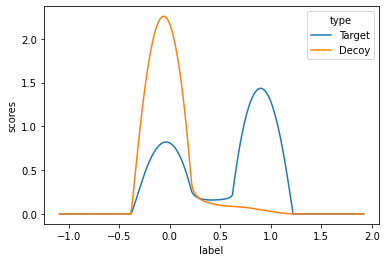

In [264]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [266]:
global_model.q_values[global_model.q_values <= 0.1]

array([0.01983058, 0.01985018, 0.01995255, ..., 0.03431987, 0.09429913,
       0.06825642])

In [179]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00070422, 0.        , 0.00162258, ..., 0.00949106, 0.00982631,
       0.00941716])